## 1. CNN 구현, CNN 시각화하기 (25점)

### 문제1. CNN 시각화

1) 코드의 '???'를 채워주세요.

In [1]:
# 코드를 실행해주세요.
import numpy as np
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

class_names= ['airplane', 'automobile', ' bird', 'cat', 'deer', 'dog', 'frog',
             'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


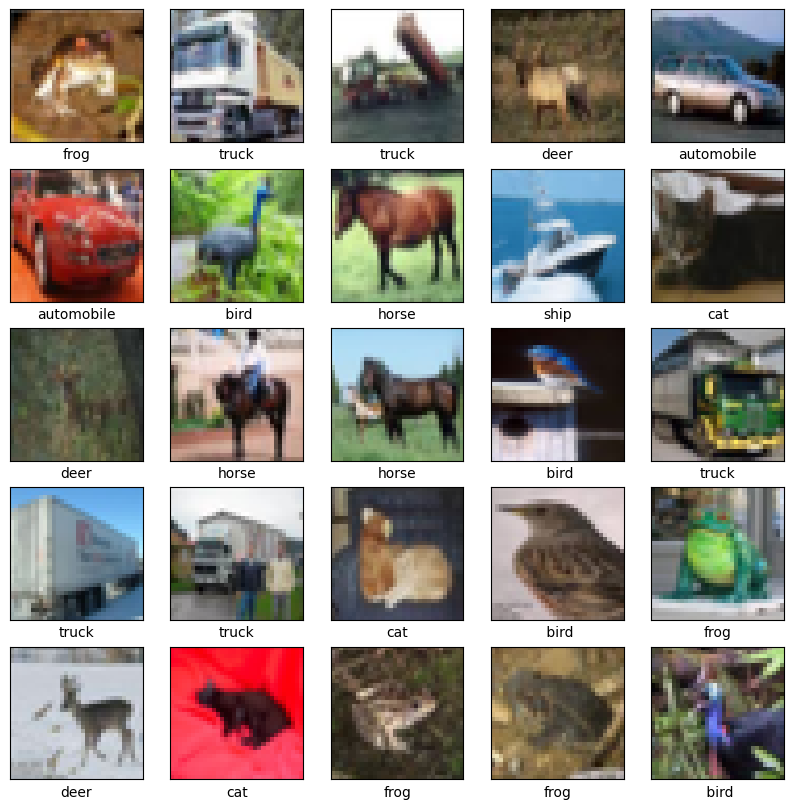

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary )
    plt.xlabel(class_names[(y_train[i][0])])

plt.show()

### 문제2. CNN acc vs CNN_MaxPooling, Dropout acc

1) CNN acc. 코드의 '???'를 채워주세요.

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [ ]:
#1. 데이터
datasets = mnist
(x_train, y_train),(x_test, y_test) = datasets.load_data()
#print(datasets.load_data())

# 정규화
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape, y_train.shape)

# 차원 수 맞추기
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

#2. 모델구성. ReLU 활성화 함수를 이용해주세요.
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),
                input_shape =(28,28,1)))
model.add(Conv2D(64, (3,3), activation= 'relu' ))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128, activation= 'relu' ))
model.add(Dense(10, activation='softmax'))

#3. 컴파일, 훈련
model.compile(loss= 'SparseCategoricalCrossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=256)

#4. 평가, 예측
loss ,acc = model.evaluate(x_test, y_test)
print('loss : ', loss)
print('acc : ', acc)

(60000, 28, 28) (60000,)
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8858 - loss: 0.3600
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9867 - loss: 0.0438
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9918 - loss: 0.0261
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9940 - loss: 0.0180
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9953 - loss: 0.0128
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9955 - loss: 0.0132
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9968 - loss: 0.0093
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9972 - loss: 0.0084
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9979 - loss: 0.0061
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9985 - loss: 0.0053
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9827 - loss: 0.0780
loss :  0.06259779632091522


2) CNN_MaxPooling, Dropout acc. 코드의 '???'를 채워주세요.

In [ ]:
#1. 데이터
datasets = mnist
(x_train, y_train),(x_test, y_test) = datasets.load_data()
#print(datasets.load_data())

# 정규화
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape, y_train.shape)

# 차원수 맞추기
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# 2.모델구성
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),
                 activation='relu',
                 input_shape = (28,28,1)))

model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

#3. 컴파일, 훈련
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=256)

#4. 평가, 예측
loss ,acc = model.evaluate(x_test, y_test)
print('loss : ', loss)
print('acc (Dropout & Maxpooling): ', acc)

(60000, 28, 28) (60000,)
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8356 - loss: 0.5297
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9793 - loss: 0.0670
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9857 - loss: 0.0470
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0364
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9910 - loss: 0.0282
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9929 - loss: 0.0228
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9937 - loss: 0.0207
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9931 - loss: 0.0200
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9945 - loss: 0.0174
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9946 - loss: 0.0163
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9867 - loss: 0.0395
loss :  0.028644748032093048
acc (Drop

3) 1)의 acc와 2)의 acc를 적어주고 해당 차이가 왜 발생하였는지 설명해주세요.

답)1)0.9866999 2) 0.9909999. MaxPooling과 Dropout 을 통해 acc를 개선

### 문제 3. CNN 실습

1) 필터의 크기는 3*3, 채널수는 1, 필터의 개수는 5일 때, 코드의 '???'를 채워주세요.

In [4]:
# 실행해주세요
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
mnist = datasets.mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


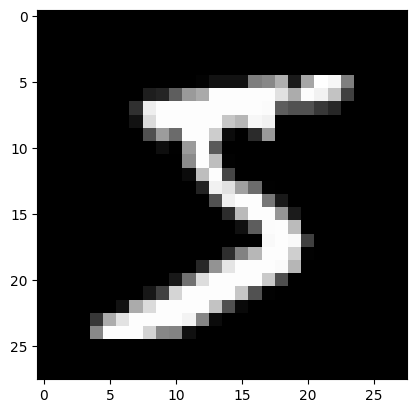

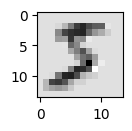

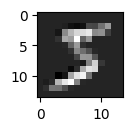

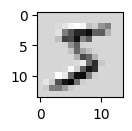

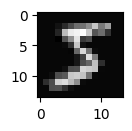

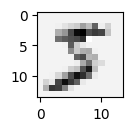

In [5]:
# 이미지화
img=train_x[0]
plt.imshow(img, cmap='gray')
plt.show()

img=img.reshape(-1,28,28,1)

# 컨볼루션 연산 수행 및 시각화
W1=tf.random.normal([3,3,1,5], stddev=0.01)
conv2d=tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
conv2d_img=conv2d.numpy()
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray'), plt.show()

2) 코드의 '???'를 채워주세요.

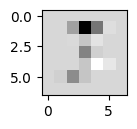

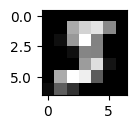

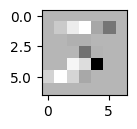

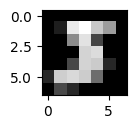

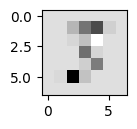

In [6]:
# Pooling Layer 만들기
pool=tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
pool_img=pool.numpy()
pool_img=np.swapaxes(pool_img,0,3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7,7), cmap='gray'), plt.show()

3) Convolution Layer, Pooling Layer를 거침으로써 이미지들이 어떻게 됐는지, 해당 과정이 CNN에서 어떤 역할을 하는지 설명해주세요.

답)

4) 코드의 '???'를 채워주세요.

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0
train_y_onehot = to_categorical(train_labels)
test_y_onehot = to_categorical(test_labels)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

5) 위에 나온 정보를 바탕으로 Convolution Layer에서 conv2d의 가중치, 편향치, 파라미터수를 구하세요. (5점)

In [11]:
#conv2d
가중치 = (3 * 3) * (1) * (32)
편향치 = (32)
파라미터_수 = 320


### 2. LeNet, AlexNet (25점)

LeNet-5를 파이토치로 구현하는 코드입니다.
<br>데이터는 LeNet을 발표한 논문에서 이용한 MNIST 데이터를 이용하였습니다.
<br>문제 하단의 코드만 수정하시면 됩니다.

In [ ]:
# 필요한 라이브러리 import (그대로 실행하세요.)
import numpy as np
from datetime import datetime

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

from torchvision import datasets, transforms

import matplotlib.pyplot as plt

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# parameters 설정

RANDOM_SEED = 42
LEARNING_RATE = 0.001
BATCH_SIZE = 32
N_EPOCHS = 15

IMG_SIZE = 32
N_CLASSES = 10

In [ ]:
# accuracy function, loss function 정의

# 전체 data_loader에 대한 예측의 정확도를 계산하는 함수
def get_accuracy(model, data_loader, device):
    correct_pred = 0
    n = 0

    with torch.no_grad():
        model.eval()
        for X, y_true in data_loader:

            X = X.to(device)
            y_true = y_true.to(device)

            _, y_prob = model(X)
            _, predicted_labels = torch.max(y_prob, 1)

            n += y_true.size(0)
            correct_pred += (predicted_labels == y_true).sum()

    return correct_pred.float() / n

# training과 validation loss를 시각화하는 함수
def plot_losses(train_losses, valid_losses):
    plt.style.use('seaborn')

    train_losses = np.array(train_losses)
    valid_losses = np.array(valid_losses)

    fig, ax = plt.subplots(figsize = (8, 4.5))

    ax.plot(train_losses, color='blue', label='Training loss')
    ax.plot(valid_losses, color='red', label='Validation loss')
    ax.set(title="Loss over epochs",
            xlabel='Epoch',
            ylabel='Loss')
    ax.legend()
    fig.show()

    plt.style.use('default')

In [ ]:
# training data에 사용되는 helper 함수 정의

def train(train_loader, model, criterion, optimizer, device):
    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad()

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

        # 역전파
        loss.backward()
        optimizer.step()

    epoch_loss = running_loss / len(train_loader.dataset)
    return model, optimizer, epoch_loss

In [ ]:
# validation data에 사용되는 함수 정의
# training loop의 validation 단계에 대한 함수

def validate(valid_loader, model, criterion, device):
    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        # 순전파와 손실 기록하기
        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss

#### 문제 1. 코드의 '???' 부분을 채워주세요. (2점)

In [ ]:
# training loop 정의하기

def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    # metrics를 저장하기 위한 객체 설정
    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # model 학습하기
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, optimizer, (train_losses, valid_losses)

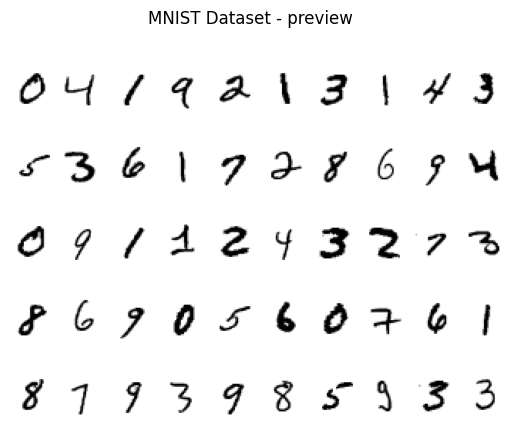

In [ ]:
# data 준비하기
# transforms 정의하기
transforms = transforms.Compose([transforms.Resize((32, 32)),
                                 transforms.ToTensor()])

# data set 다운받고 생성하기
train_dataset = datasets.MNIST(root='mnist_data',
                               train=True,
                               transform=transforms,
                               download=True)

valid_dataset = datasets.MNIST(root='mnist_data',
                               train=False,
                               transform=transforms)

# data loader 정의하기
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True)

valid_loader = DataLoader(dataset=valid_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=False)

# 불러온 MNIS data 확인하기
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure()
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(train_dataset.data[index], cmap='gray_r')
fig.suptitle('MNIST Dataset - preview');

#### 문제 2. 코드의 '???' 부분을 채워주세요. (4점)

In [ ]:
# LeNet-5 구조 정의하기

class LeNet5(nn.Module):

    def __init__(self, n_classes):
        super(LeNet5, self).__init__()

        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
            nn.Tanh()
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=n_classes),
        )


    def forward(self, x):
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

#### 문제 3. 코드의 '???' 부분을 채워주세요. (2점)
- Adam optimizer 사용

In [ ]:
# model, optimizer, loss function 설정하기

torch.manual_seed(RANDOM_SEED)

model = LeNet5(N_CLASSES).to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
criterion = nn.CrossEntropyLoss()

#### 문제 4. 코드의 '???' 부분을 채워주세요. (2점)

05:36:38 --- Epoch: 0	Train loss: 0.2290	Valid loss: 0.1020	Train accuracy: 96.84	Valid accuracy: 96.81
05:37:09 --- Epoch: 1	Train loss: 0.0762	Valid loss: 0.0619	Train accuracy: 98.39	Valid accuracy: 98.19
05:37:38 --- Epoch: 2	Train loss: 0.0550	Valid loss: 0.0542	Train accuracy: 98.59	Valid accuracy: 98.45
05:38:07 --- Epoch: 3	Train loss: 0.0438	Valid loss: 0.0486	Train accuracy: 99.07	Valid accuracy: 98.41
05:38:36 --- Epoch: 4	Train loss: 0.0344	Valid loss: 0.0418	Train accuracy: 99.24	Valid accuracy: 98.74
05:39:04 --- Epoch: 5	Train loss: 0.0301	Valid loss: 0.0417	Train accuracy: 99.40	Valid accuracy: 98.75
05:39:33 --- Epoch: 6	Train loss: 0.0244	Valid loss: 0.0521	Train accuracy: 99.26	Valid accuracy: 98.20
05:40:02 --- Epoch: 7	Train loss: 0.0219	Valid loss: 0.0498	Train accuracy: 99.42	Valid accuracy: 98.42
05:40:30 --- Epoch: 8	Train loss: 0.0184	Valid loss: 0.0486	Train accuracy: 99.53	Valid accuracy: 98.60
05:40:59 --- Epoch: 9	Train loss: 0.0166	Valid loss: 0.0483	Trai

<ipython-input-12-48a42c79f411>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


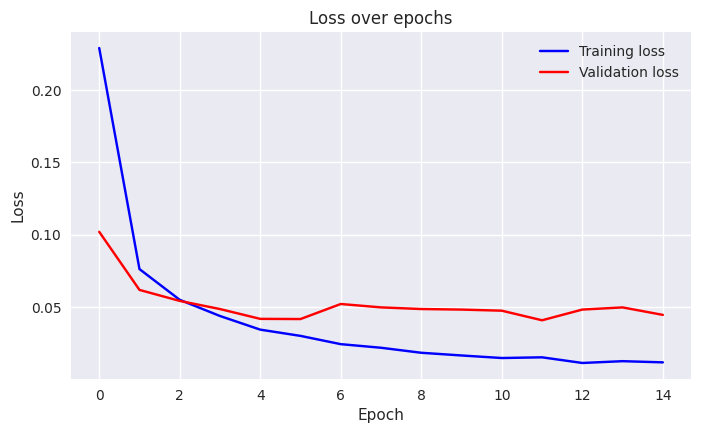

In [ ]:
# 신경망 학습하기

model, optimizer, _ = training_loop(model, criterion, optimizer, train_loader,
                                    valid_loader, N_EPOCHS, DEVICE)

다음은 AlexNet을 사용하여 CIFAR 10 이미지를 분류해보는 문제입니다.
<br>마찬가지로 문제 하단의 코드만 수정해주세요.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

100%|██████████| 170498071/170498071 [00:03<00:00, 48371811.94it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


#### 문제 5. 다음 조건에 맞게 AlexNet 모델을 구축하는 코드를 완성해주세요. (5점)
조건 1. Max-pooling layer는 1, 2, 5번째 conv layer 뒤에 위치한다.
<br>조건 2. ReLU는 모든 conv layer와 fc layer 뒤에 위치한다.

In [ ]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,64,3), nn.ReLU(), #Conv2d(입력채널수, 출력채널수, 필터 크기)
            nn.MaxPool2d(2,2),
            nn.Conv2d(64, 192, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(192, 384, 3, padding=1), nn.ReLU(),
            nn.Conv2d(384, 256, 3, padding=1), nn.ReLU(),
            nn.Conv2d(256, 256, 1), nn.ReLU(),
            nn.MaxPool2d(2,2))

        # Dense layer 구축
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256*3*3, 1024), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024,512), nn.ReLU(),
            nn.Linear(512,10))

    def forward(self, x):
        x = self.features(x)
        x = x.view(-1, 256*3*3)
        x = self.classifier(x)
        return x

In [ ]:
alexnet = AlexNet().to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(alexnet.parameters(), lr=1e-3)

#### 문제 6. 코드의 '???' 부분을 채워주세요. (7점)

In [ ]:
loss_ = []

n = len(trainloader) # 배치 개수

for epoch in range(50):
    running_loss = 0.0
    for data in trainloader:
        inputs, labels = data[0].to(DEVICE), data[1].to(DEVICE) # 배치 데이터
        optimizer.zero_grad()
        outputs = alexnet(inputs) # 예측값 산출
        loss = criterion(outputs, labels) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 선언
        optimizer.step() # 가중치 최적화
        running_loss += loss.item()

    loss_.append(running_loss / n)
    print('[%d] loss: %.3f' %(epoch +1, running_loss / len(trainloader)))

[1] loss: 1.651
[2] loss: 1.239
[3] loss: 1.067
[4] loss: 0.941
[5] loss: 0.847
[6] loss: 0.786
[7] loss: 0.730
[8] loss: 0.688
[9] loss: 0.647
[10] loss: 0.610
[11] loss: 0.580
[12] loss: 0.547
[13] loss: 0.528
[14] loss: 0.505
[15] loss: 0.468
[16] loss: 0.460
[17] loss: 0.434
[18] loss: 0.416
[19] loss: 0.403
[20] loss: 0.384
[21] loss: 0.372
[22] loss: 0.362
[23] loss: 0.343
[24] loss: 0.339
[25] loss: 0.329
[26] loss: 0.309
[27] loss: 0.306
[28] loss: 0.292
[29] loss: 0.287
[30] loss: 0.287
[31] loss: 0.274
[32] loss: 0.264
[33] loss: 0.264
[34] loss: 0.241
[35] loss: 0.248
[36] loss: 0.248
[37] loss: 0.241
[38] loss: 0.244
[39] loss: 0.233
[40] loss: 0.224
[41] loss: 0.239
[42] loss: 0.211
[43] loss: 0.240
[44] loss: 0.224
[45] loss: 0.235
[46] loss: 0.229
[47] loss: 0.219
[48] loss: 0.230
[49] loss: 0.230
[50] loss: 0.221


#### 문제 7. 코드의 '???' 부분을 채워주세요. (4점)

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    alexnet.eval()
    for data in testloader:
        images, labels = data[0].to(DEVICE), data[1].to(DEVICE)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0) # 개수 누적(총 개수)
        correct += (predicted == labels).sum().item() # 누적(맞으면 1, 틀리면 0으로 합산)

print('Test accuracy: %.2f %%' % (100 * correct / total))

Test accuracy: 74.60 %
